### **椒盐噪声**

椒盐噪声又称为脉冲噪声，会随机改变图像上的像素值，是相机、传输通道、解码处理等过程中生成的黑白相间的亮暗点噪声

OpenCV4没有提供专门添加椒盐噪声的函数，需要自行编写，添加的过程大致可分为以下4个步骤：

1. 确定椒盐噪声的位置，生成两个随机数分别确定该噪声产生的行和列
2. 确定噪声的种类，噪声是黑色和白色也是随机的，需要生成随机数判断
3. 修改图像像素的灰度值，通道数不同的图像表示白色的方式也不相同，如果是多通道的图像，每个通道的值都要改变
4. 得到带有椒盐噪声的图像

In [43]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [44]:
def add_noisy(image, n=10000):
    # 深拷贝原图像
    result = image.copy()
    # 获取图像的宽和高
    w, h = image.shape[:2]
    # n表示生成多少个噪点
    for i in range(n):
        # 分别在宽和高的范围内生成一个随机值，模拟代表(x, y)坐标
        x = np.random.randint(1, w)
        y = np.random.randint(1, h)
        if np.random.randint(0, 2) == 0:
            # 生成白色噪声（盐噪声）
            result[x, y] = 0
        else:
            # 生成黑色噪声（椒噪声）
            result[x, y] = 255
    return result

In [45]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'dolphins.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read dolphins.jpg')
    sys.exit

In [46]:
# 为灰度图像添加椒盐噪声
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_image_noisy = add_noisy(gray_image, 10000)
# 为彩色图像添加椒盐噪声
color_image_noisy = add_noisy(img, 10000)

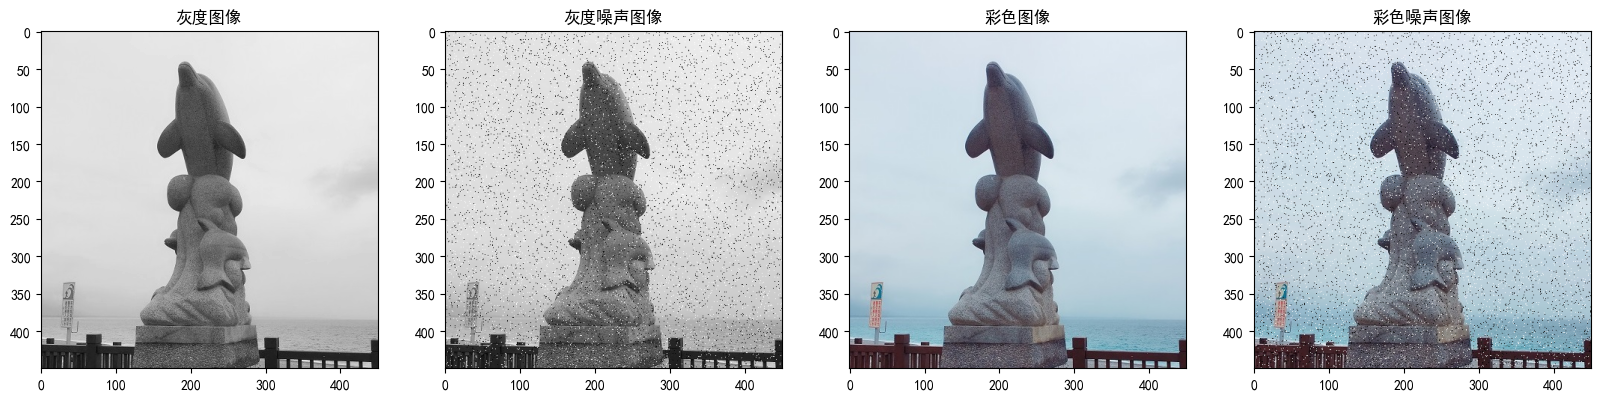

In [47]:
# 展示结果
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.title('灰度图像')
plt.imshow(gray_image, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('灰度噪声图像')
plt.imshow(gray_image_noisy, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('彩色图像')
plt.imshow(img)
plt.subplot(1, 4, 4)
plt.title('彩色噪声图像')
plt.imshow(color_image_noisy)

由于椒盐噪声是随机添加的，每次运行的结果都会有差异